# AIRIMA 실습

In [9]:
# ① 데이터 연결하기
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p ~/aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic
!cp ~/data/Daily_Demand_Forecasting_Orders.csv aiffel/time_series_basic/

In [2]:
# ② 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

Matplotlib is building the font cache; this may take a moment.


In [11]:
# ③ 데이터 불러오기
df = pd.read_csv('aiffel/time_series_basic/Daily_Demand_Forecasting_Orders.csv', delimiter=';')

In [12]:
# ④ 데이터 확인
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

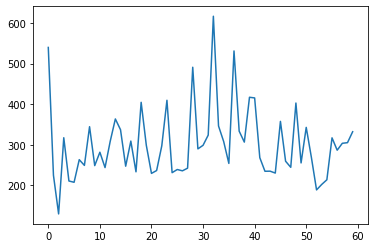

In [13]:
# ④ 데이터 확인 및 시각화
data = df['Target (Total orders)']
plt.plot(data)
plt.show()

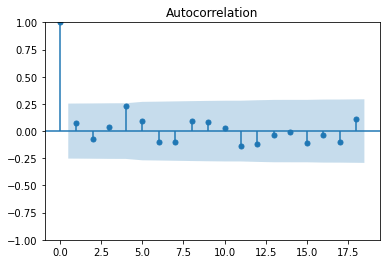

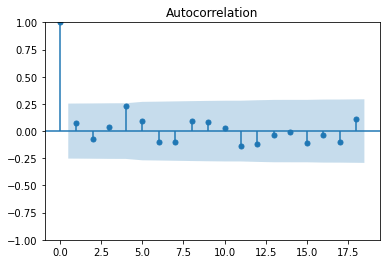

In [14]:
# ⑤ ACF를 통한 데이터 확인 및 시각화
plot_acf(data)

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


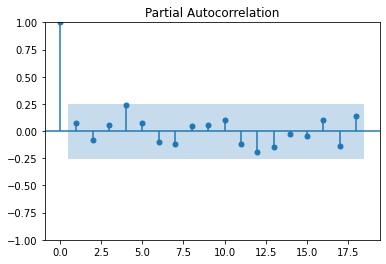

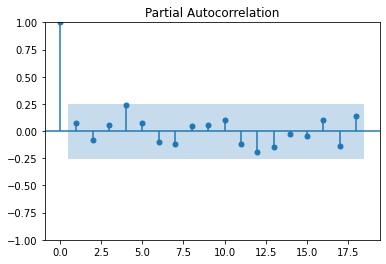

In [15]:
# ⑤ PACF를 통한 데이터 확인 및 시각화
plot_pacf(data)

In [16]:
# ⑥ ARIMA 적용
model1 = ARIMA(data, order=(1,0,0))
model2 = ARIMA(data, order=(0,0,1))
model3 = ARIMA(data, order=(1,0,1))

res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()

In [17]:
# ⑦ ARIMA 결과 확인
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Thu, 20 Nov 2025   AIC                            714.362
Time:                           02:05:24   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5795   1363

In [18]:
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(0, 0, 1)   Log Likelihood                -354.143
Date:                   Thu, 20 Nov 2025   AIC                            714.286
Time:                           02:07:50   BIC                            720.569
Sample:                                0   HQIC                           716.743
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.3222     17.628     17.094      0.000     266.773     335.872
ma.L1          0.0982      0.179      0.548      0.583      -0.253       0.449
sigma2      7837.9609   1382

In [19]:
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Thu, 20 Nov 2025   AIC                            716.150
Time:                           02:08:27   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

In [20]:
predictions = res2.fittedvalues

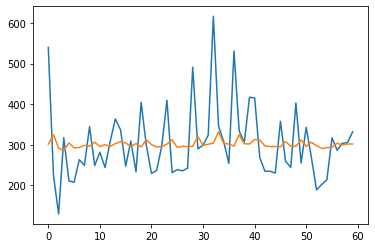

In [21]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

In [22]:
# ⑧ Auto ARIMA 적용
model = pm.AutoARIMA(seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

In [23]:
res = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.725, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.0

In [24]:
# 결과 확인
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -354.355
Date:                Thu, 20 Nov 2025   AIC                            712.710
Time:                        02:10:17   BIC                            716.898
Sample:                             0   HQIC                           714.348
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    300.8733     15.236     19.747      0.000     271.011     330.736
sigma2      7894.7169   1313.366      6.011      0.000    5320.567    1.05e+04
Ljung-Box (L1) (Q):                   0.33   Jarque-

# 미니 프로젝트: ARIMA, ARCH

In [5]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p ~aiffel/time_series_basic 
# !ln -s data/* aiffel/time_series_basic
!cp ~/data/AirPassengers.csv aiffel/time_series_basic/

In [6]:
!pip install arch==6.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 KB 12.2 MB/s eta 0:00:0000:0100:01


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [8]:
ap = pd.read_csv('aiffel/time_series_basic/AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

데이터 확인하기

In [9]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


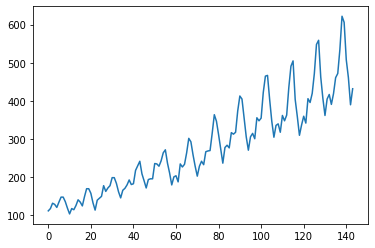

In [10]:
plt.plot(ap)
plt.show()

분산을 일정하게 만들기 - log transformation

In [11]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)

In [12]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


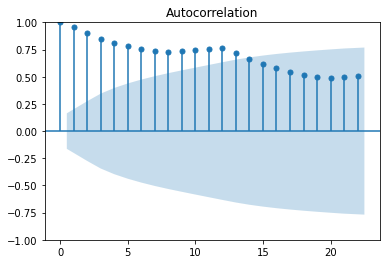

In [13]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot();

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


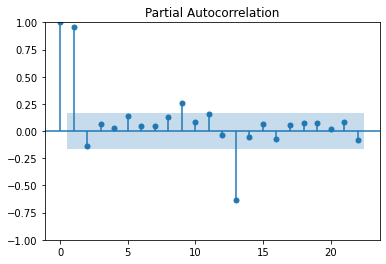

In [14]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot();

차분을 통해 분석하기

In [15]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

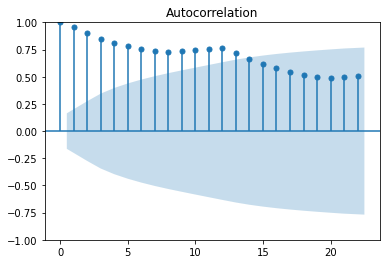

In [16]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_transformed)
plt.plot();

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


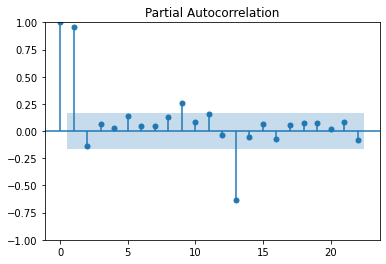

In [17]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_transformed)
plt.plot();

In [18]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


향후 test에 활용할 부분을 분리

In [20]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

Auto ARIMA 적용 및 결과 확인

In [21]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-196.569, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 4.074 seconds


In [23]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'numpy.ndarray'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
[6.18010083 6.14616332 6.15817888 6.17019443 6.18220998 6.19422554
 6.20624109 6.21825665 6.2302722  6.24228775 6.25430331 6.26631886
 6.27833442 6.29034997 6.30236553 6.31438108 6.32639663 6.33841219
 6.35042774 6.3624433  6.37445885 6.3864744  6.39848996 6.41050551
 6.42252107 6.43453662 6.44655218 6.45856773 6.47058328]
--------------------------------------------------------------------------------
[[5.98736259 6.37283907]
 [5.85107277 6.44125387]
 [5.82729445 6.48906331]
 [5.807027   6.53336186]
 [5.78940386 6.57501611]
 [5.77386531 6.61458577]
 [5.760025   6.65245718]
 [5.74760298 6.68891031]
 [5.73638867 6.72415573]
 [5.72621895 6.75835656]
 [5.71696441 6.7916422 ]
 [5.70852037 6.82411736]
 [5.70080067 6.85586817]
 [5.69373342 6.88696652]
 [5.68725791 6.91747314]
 [5.681322

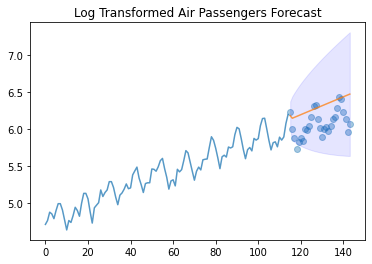

In [24]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.

x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

ARCH 모델 실습해보기

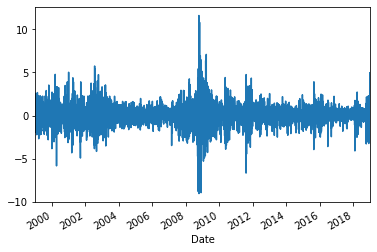

In [25]:
# 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

In [26]:
# ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Thu, Nov 20 2025   Df Residuals:                     5029
Time:         

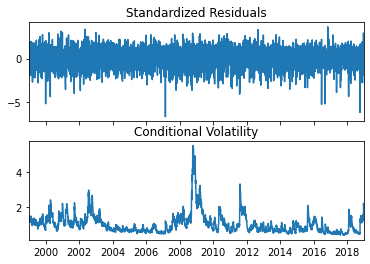

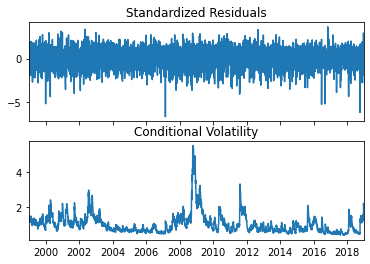

In [27]:
# 시각화를 통한 결과값 확인
res.plot()